In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
# Load the dataset
data = pd.read_csv('AmesHousing.csv')

# Display the first few rows of the dataset
print(data.head())


   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

In [8]:
# Check for missing values
print(data.isnull().sum())

# Example: Fill missing values
for col in data.columns:
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(data[col]):
        data[col].fillna(data[col].mean(), inplace=True)
    else:
        # If not numeric, fill with the most frequent value
        data[col].fillna(data[col].mode()[0], inplace=True)

# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# Select relevant features (this is an example, you may need to adjust)
features = data.drop('SalePrice', axis=1)  # assuming 'SalePrice' is the target variable
target = data['SalePrice']

Order                     0
PID                       0
MS SubClass               0
Lot Frontage              0
Lot Area                  0
                         ..
Sale Condition_AdjLand    0
Sale Condition_Alloca     0
Sale Condition_Family     0
Sale Condition_Normal     0
Sale Condition_Partial    0
Length: 263, dtype: int64


<ipython-input-8-9b389b740c74>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [10]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [11]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [12]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 1300522802.026165
R^2 Score: 0.837790454982797


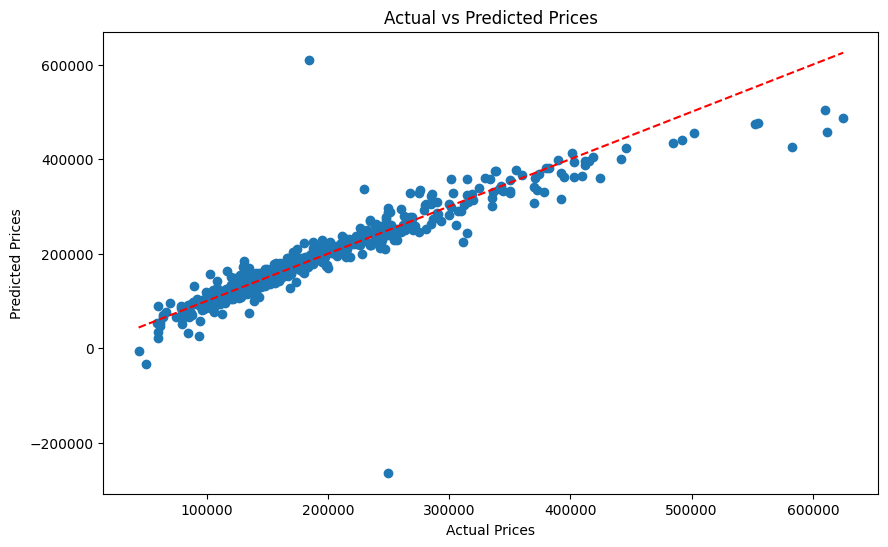

In [13]:
# Plotting the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # ideal line
plt.show()
